In [1]:
# !pip install librosa
# !pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import IPython as ip
import os
import librosa
import librosa.display
from IPython.core.interactiveshell import InteractiveShell
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"
colors = sns.color_palette('tab10')

In [2]:
def read_data(music_data):
    m_data = pd.read_csv(music_data)
    return m_data
m_data = read_data("features_3_sec.csv")
m_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
m_data.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [4]:
for i in os.listdir('music'):
    print(i)
#     if '.wav' in i:
#         ip.display.Audio(os.path.join('music', i))

rock.00000.wav
reggae.00000.wav
hiphop.00000.wav
disco.00000.wav
jazz.00000.wav
pop.00000.wav
metal.00000.wav
blues.00000.wav
country.00000.wav
classical.00000.wav


<AxesSubplot:title={'center':'Blues raw audio'}>

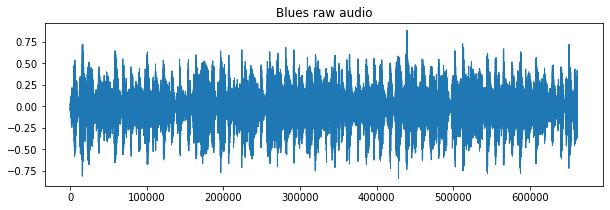

In [5]:
audio_path = "music/blues.00000.wav"
audio, sr = librosa.load(audio_path)
pd.Series(audio).plot(figsize=(10, 3), lw=1, title = 'Blues raw audio')
plt.show()

<AxesSubplot:title={'center':'Harmonic Blues raw audio'}>

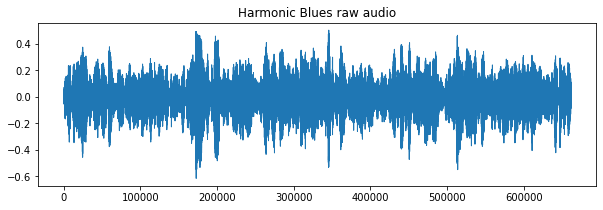

In [6]:
audio_harmonic = librosa.effects.harmonic(audio)
pd.Series(audio_harmonic).plot(figsize=(10, 3), lw=1, title = 'Harmonic Blues raw audio')
ip.display.Audio(audio_harmonic, rate=22050)

[Text(0.5, 1.0, 'Linear-frequency power spectrogram')]

[Text(0.5, 1.0, 'Log-frequency power spectrogram')]

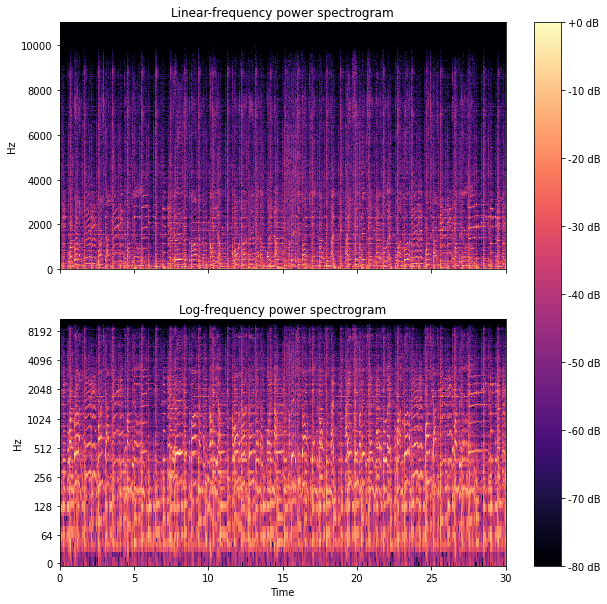

In [7]:
y, sr = librosa.load("music/blues.00000.wav")
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()
hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

[Text(0.5, 1.0, 'rock.00000.wav')]

[Text(0.5, 1.0, 'reggae.00000.wav')]

[Text(0.5, 1.0, 'hiphop.00000.wav')]

[Text(0.5, 1.0, 'disco.00000.wav')]

[Text(0.5, 1.0, 'jazz.00000.wav')]

[Text(0.5, 1.0, 'pop.00000.wav')]

[Text(0.5, 1.0, 'metal.00000.wav')]

[Text(0.5, 1.0, 'blues.00000.wav')]

[Text(0.5, 1.0, 'country.00000.wav')]

[Text(0.5, 1.0, 'classical.00000.wav')]

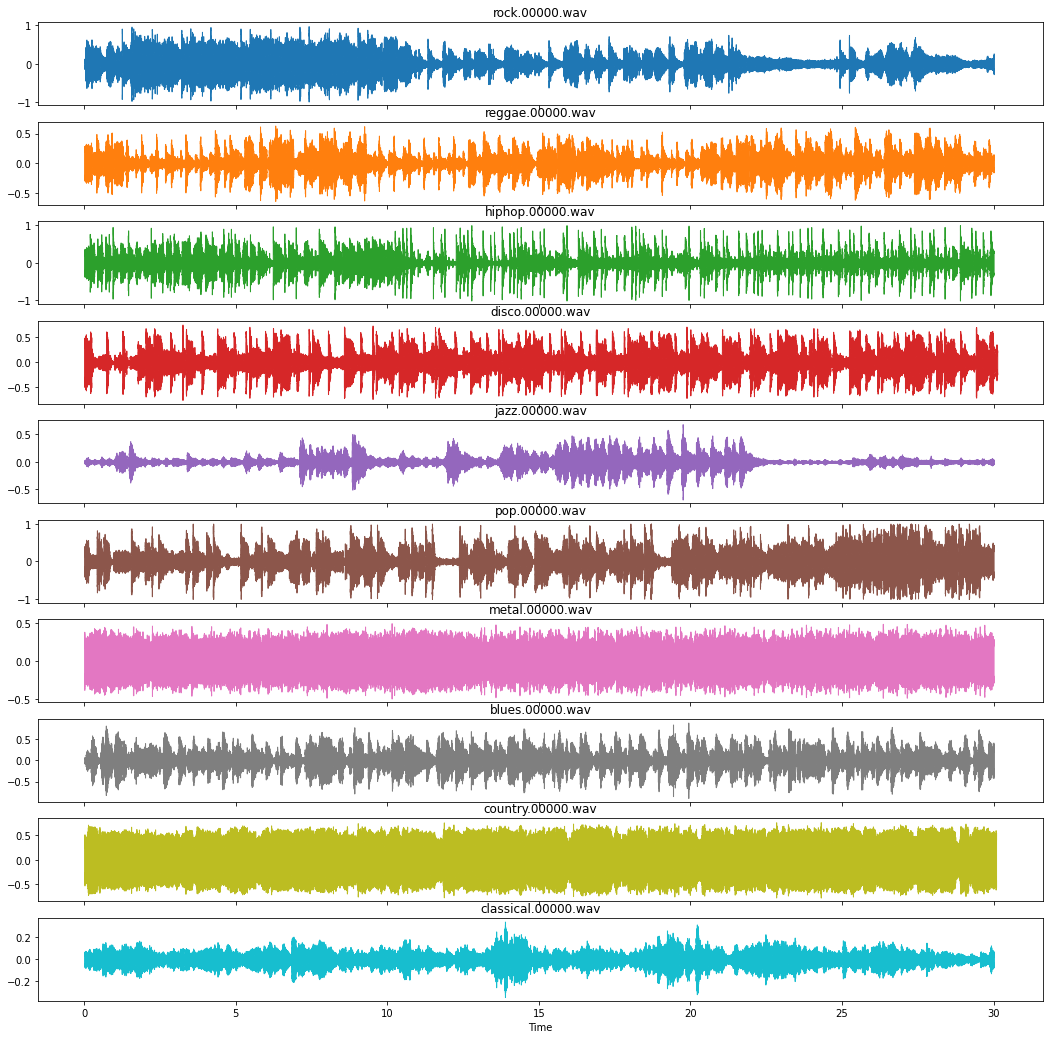

In [8]:
fig, ax = plt.subplots(nrows=len(os.listdir('music')), sharex=True, figsize=(18, 18))
files = os.listdir('music')
# files.pop()
for j, i in enumerate(files):
    try:
        y, sr = librosa.load(os.path.join('music', i))
    except:
        continue
    librosa.display.waveshow(y, sr=sr, ax=ax[j], color=colors[j])
    ax[j].set(title=i.split("/")[-1])
    ax[j].label_outer()

In [3]:
class MachineLearning:
    def __init__(self, seperated_data):
        self.seperated_data = seperated_data

    def KNN_Classification(self, *, n_neighbors=5, algorithm='auto'):
        clf = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm)
        clf.fit(self.seperated_data[0], self.seperated_data[2])
        pred = clf.predict(self.seperated_data[1])
        print(classification_report(self.seperated_data[3], pred))
        print(accuracy_score(self.seperated_data[3], pred))

    def SVC_Classification(self, *, C=1.0, kernel='rbf', tol=1e-3, class_weight=None, random_state=42):
        clf = SVC(C=C, kernel=kernel, tol=1e-3, class_weight=class_weight, random_state=random_state)
        clf.fit(self.seperated_data[0], self.seperated_data[2])
        pred = clf.predict(self.seperated_data[1])
        print(classification_report(self.seperated_data[3], pred))
        print(accuracy_score(self.seperated_data[3], pred))

    def MLP_Classifier(self):
        clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(300, 400, 500, 400, 300), random_state=1)
        clf.fit(self.seperated_data[0], self.seperated_data[2])
        pred = clf.predict(self.seperated_data[1])
        print(classification_report(self.seperated_data[3], pred))
        print(accuracy_score(self.seperated_data[3], pred))


try:
    m_data = m_data.drop(['filename'], axis=1)
except:
    pass
encoder = LabelEncoder()
scaler = StandardScaler()
data = m_data.iloc[:, :-1]
labels = m_data.iloc[:, -1]
X = scaler.fit_transform(data)
y = encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

seperated_data = (X_train, X_test, y_train, y_test)

ml = MachineLearning(seperated_data)
ml.KNN_Classification(n_neighbors=10)
ml.SVC_Classification(C=100)
ml.MLP_Classifier()

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       319
           1       0.86      0.96      0.91       308
           2       0.77      0.81      0.79       286
           3       0.77      0.89      0.83       301
           4       0.91      0.86      0.88       311
           5       0.87      0.84      0.85       286
           6       0.94      0.90      0.92       303
           7       0.91      0.89      0.90       267
           8       0.81      0.86      0.84       316
           9       0.87      0.72      0.79       300

    accuracy                           0.86      2997
   macro avg       0.86      0.86      0.86      2997
weighted avg       0.86      0.86      0.86      2997

0.8561895228561895
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.89      0.97      0.93       308
           2       0.85      0.85      0.85       286
     